In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegressionAnalysis:
    def __init__(self):
        self.df = None
        self.trainX = None
        self.trainY = None
        self.testX = None
        self.testY = None
        self.b = None        
        self.cols = None
    
    def load_data(self, fname):
        """
        Load data from file
        Drop all non-numeric columns
        """
        
        self.df = pd.read_csv(fname)
        self.df = self.df.select_dtypes(include=np.number)
        
    def split_data(self, target, p=0.8, cols='all'):
        """
        Randomly split data into test and train
        """
        
        assert self.df is not None, "Need to load data before splitting"
        
        mask = np.random.rand(len(self.df)) < p
        if cols is 'all':
            cols = list(self.df.columns)
            cols.remove(target)
        
        self.cols = cols
        self.trainX = self.df.loc[mask==True, cols].to_numpy()
        self.testX = self.df.loc[mask==False, cols].to_numpy()
        
        self.trainY = self.df.loc[mask==True, target].to_numpy()
        self.testY = self.df.loc[mask==False, target].to_numpy()
        
        # Reshape feature matrices and add extra column for offset
        self.trainX = np.hstack((self.trainX.reshape(-1, len(cols)), np.ones((self.trainX.shape[0], 1))))
        self.testX = np.hstack((self.testX.reshape(-1, len(cols)), np.ones((self.testX.shape[0], 1))))
        
        
    def fit(self):
        """
        Fit linear regression model to training data
        """
        assert self.trainX is not None, "Need to load and split data before fitting"
        X = self.trainX
        Y = self.trainY
        self.b = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,Y))
        
    def plot_train_fit(self):
        """
        Plot linear regerssion fit. 
        
        Function only works when only one independent variable is used
        """
        
        assert self.b is not None, "Need to fit data before plotting"
        assert self.trainX.shape[1] == 2, "Too many independent variables to plot"
        
        X = self.trainX
        Y = self.trainY
        b = self.b
        
        x = [min(X[:,0]), max(X[:,0])]
        y = [x[0]*b[0] + b[1], x[1]*b[0] + b[1]]

        plt.scatter(X[:,0], Y)
        plt.plot(x, y, c='r')
        plt.xlabel('Average number of rooms per house')
        plt.ylabel('Price')
        plt.show()
        
    def print_test_error(self):
        """
        Print mean square error and mean absolute error of test se
        """
        mse = np.mean((np.dot(self.testX, self.b) - self.testY)**2)
        mae = np.mean(np.abs(np.dot(self.testX, self.b) - self.testY))
        
        print("MSE on test data is {}".format(mse))
        print("MAE on test data is {}".format(mae))

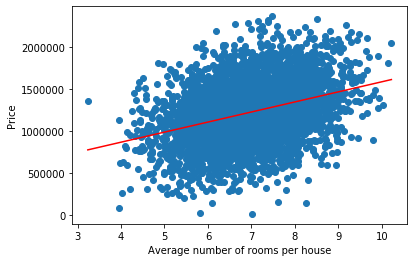

MSE on test data is 108619318098.51057
MAE on test data is 267633.427168068


In [3]:
# Fit on a single independent variable (average numbe of rooms)

obj = LinearRegressionAnalysis()
obj.load_data('usa-housingcsv.zip')
obj.split_data(target='Price', cols=['Avg. Area Number of Rooms'])
obj.fit()
obj.plot_train_fit()
obj.print_test_error()

In [4]:
# Fit on all independent variables

obj.split_data(target='Price')
obj.fit()
obj.print_test_error()

MSE on test data is 10373766709.45784
MAE on test data is 82248.09143088727
